### IDs:
Insert yours IDs to the cell below

ID #1:

ID #2:


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

In [1]:
def calculate_sample_number(defective_prob, confidence):
    none_defective_prob = 1  - defective_prob
    none_confidence = 1 - confidence
    initial_none_defective_prod =  none_defective_prob
    cnt = 1 
    while initial_none_defective_prod > none_confidence:
        cnt +=1 
        initial_none_defective_prod = initial_none_defective_prod * none_defective_prob
    print(cnt)

calculate_sample_number(0.03, 0.85)

63


In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, nbinom

In [6]:
def find_n(p, confidence):  
    n = 1
    while binom.pmf(0, n, 0.03) > 1 - confidence:
        n+=1
    return n

find_n(0.03, 0.85)

63

#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [7]:
print(find_n(0.04, 0.95))

99


#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

In [72]:
def from_class(p, r, confidence):
    X = nbinom(r,p, loc=r)
    i = np.arange(0,100)
    p_X_i = X.cdf(i)
    valid_idx = np.where(p_X_i >= 0.9)[0][0]
    print('size of batch: ' + str(valid_idx) + ' prob: ' + str(p_X_i[valid_idx]))
    


from_class(0.1, 5, 0.9)
from_class(0.3,15,0.9)

size of batch: 78 prob: 0.9006056767326884
size of batch: 64 prob: 0.9025706028157261


### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

6350.0
6000.0


6000.0

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

<IPython.core.display.Javascript object>


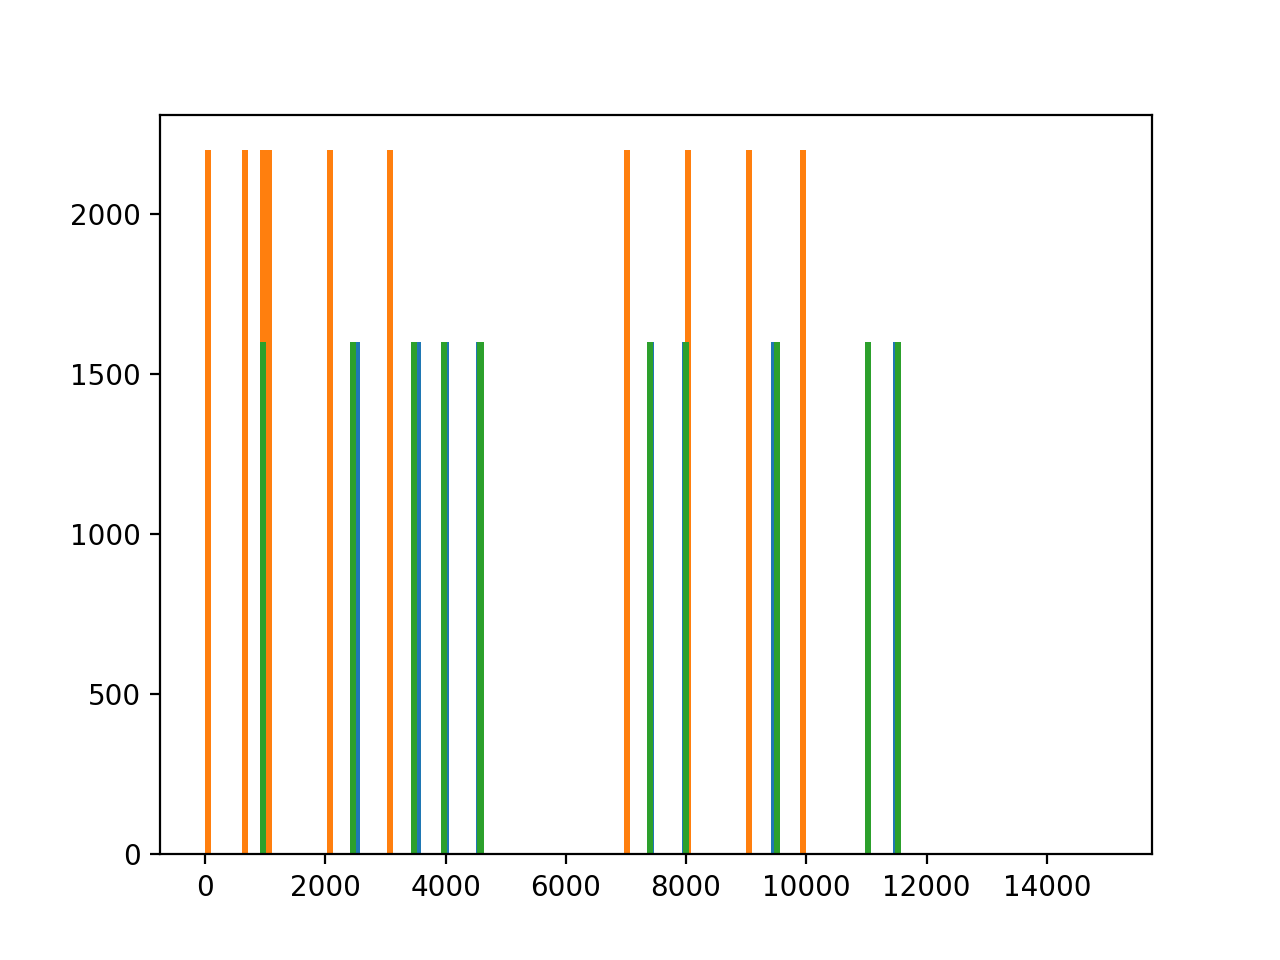

sh mean: 6300.0
sh iqr: 6000.0
rg mean: 4200.0
rg iqr: 7000.0


In [142]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random
import matplotlib.pyplot as plt
from scipy.stats import iqr

# SH_MEAN = 6300
sh_base=  [1000, 2500, 3500, 4000, 4600, 7400, 8000, 9500, 11000, 11500]
sh_full = np.repeat(sh_base, 1600)
plt.hist(sh_full, bins = np.linspace(1000, 12000, num=120 )) 
print('sh mean: ' + str(np.mean(sh_full)))
print('sh iqr: ' + str(iqr(sh_full)))
rg_base = np.linspace(1000, 10000, num=10 )
rg_base[5] = 3100
rg_base[4] = 2100
rg_base[3] = 1100
rg_base[2] = 1100
rg_base[2] = 690
rg_base[1] = 10
rg_full = np.repeat(rg_base, 2200)
plt.hist(rg_full, bins = np.linspace(0, 10000, num=100)) 
print('rg mean: ' + str(np.mean(rg_base)))
print('rg iqr: ' + str(iqr(rg_full)))

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

In [155]:
sh_base_big_var=  [1000, 1500, 2000, 4000, 4600, 7400, 8000, 9500, 11000, 14500]
sh_full_big_var = np.repeat(sh_base, 1600)
plt.hist(sh_full_big_var, bins = np.linspace(0, 15000, num=150)) 
print('variance sh new: ' + str(np.var(sh_base_big_var)))
print('variance rg: ' + str(np.var(rg_full)))
print('sh new mean: ' + str(np.mean(sh_full_big_var)))
print('sh new iqr: ' + str(iqr(sh_full_big_var)))

variance sh new: 18144500.0
variance rg: 13430620.0
sh new mean: 6300.0
sh new iqr: 6000.0


The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [218]:
import math
sh_phi_base = [12000, 13000]
print(sh_phi_base)
sh_phi_full = np.repeat(sh_phi_base, 8000)
print('mean phi: '+ str(np.mean(sh_phi_full)))
print('var phi: '+ str(np.var(sh_phi_full)))
sh_alpha = 0.97
print('my cov: ' +  str(np.cov(sh_phi_full, sh_full)[0][1]))
print('their cov: ' + str(sh_alpha * math.sqrt(np.var(sh_phi_full)) * math.sqrt(np.var(sh_full))))
diff = np.cov(sh_phi_full, sh_full)[0][1] - sh_alpha * math.sqrt(np.var(sh_phi_full)) * math.sqrt(np.var(sh_full))
print(diff / np.cov(sh_phi_full, sh_full)[0][1])

[12000, 13000]
mean phi: 12500.0
var phi: 250000.0
my cov: 1590099.3812113258
their cov: 1694171.0214733342
-0.06544977093364279


#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

### Question 3 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

### Question 4 - Convolutions

#### 4.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [2]:
from itertools import product
P = np.array([[1, 2, 3, 4, 5, 6],[1/6, 1/6, 1/6, 1/6, 1/6, 1/6]]  )
# print(P)
def NFoldConv_bad(P, n):
    probs = dict(zip(P[0], P[1]))
    current_P = P
    current_probs = probs
    print('after all sum')
    new_sums = []
    new_probs = []
    for l in all_sums:
        new_probs_dedup = {}                    
        sum_prob = probs[l[0]]
        current_sum = sum(l)
        for v in l[1:]:
            sum_prob*=probs[v]
        if current_sum in new_probs_dedup:
            new_probs_dedup[current_sum] += sum_prob
        else:
            new_probs_dedup[current_sum] = sum_prob   
    vals, probs = zip(*new_probs_dedup.items())         
    return [vals, probs]                      
                        
       
NFoldConv(P, 3)
    

[(3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0,
  15.0,
  16.0,
  17.0,
  18.0),
 (0.004629629629629629,
  0.013888888888888888,
  0.027777777777777776,
  0.046296296296296294,
  0.06944444444444445,
  0.09722222222222218,
  0.11574074074074067,
  0.12499999999999992,
  0.12499999999999992,
  0.11574074074074067,
  0.09722222222222218,
  0.06944444444444445,
  0.046296296296296294,
  0.027777777777777776,
  0.013888888888888888,
  0.004629629629629629)]

In [10]:
from itertools import product
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, nbinom

P = np.array([[1, 2, 3, 4, 5, 6],[1/6, 1/6, 1/6, 1/6, 1/6, 1/6]]  )

def NFoldConv(P, n):
    probs = dict(zip(P[0], P[1]))
    current_probs = probs
                    
    while n > 1:
        all_sums = list(product(current_probs.keys(), P[0]))
        new_probs = {}
        for s in all_sums:
            new_k = s[0] + s[1]
            if new_k in new_probs:
                    new_probs[new_k] += current_probs[s[0]] * probs[s[1]]
            else:
                new_probs[new_k] = current_probs[s[0]] * probs[s[1]]
        current_probs = new_probs
        n-=1
    return current_probs
res = NFoldConv(P, 2)  
print(list(zip(P[0], P[1])))

[(1.0, 0.16666666666666666), (2.0, 0.16666666666666666), (3.0, 0.16666666666666666), (4.0, 0.16666666666666666), (5.0, 0.16666666666666666), (6.0, 0.16666666666666666)]


#### 4.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">



In [38]:
P = [np.arange(9)[1:], np.full((8), 1/8)]
P
aa = NFoldConv(P, 17)
aa

{17: 4.440892098500626e-16,
 18: 7.549516567451064e-15,
 19: 6.794564910705958e-14,
 20: 4.303224443447107e-13,
 21: 2.1516122217235534e-12,
 22: 9.036771331238924e-12,
 23: 3.313482821454272e-11,
 24: 1.088715784192118e-10,
 25: 3.2660718574106795e-10,
 26: 9.07134811711785e-10,
 27: 2.3577291230481023e-09,
 28: 5.782673007104222e-09,
 29: 1.3473395732432891e-08,
 30: 2.998400727705075e-08,
 31: 6.401734875538523e-08,
 32: 1.3161584089260714e-07,
 33: 2.613809253482202e-07,
 34: 5.027422242953605e-07,
 35: 9.38663699212583e-07,
 36: 1.7045993589981379e-06,
 37: 3.015970226893927e-06,
 38: 5.206881849684208e-06,
 39: 8.783168114145923e-06,
 40: 1.449303744882613e-05,
 41: 2.3418493098503745e-05,
 42: 3.7090165106334894e-05,
 43: 5.762708941681183e-05,
 44: 8.790117605705916e-05,
 45: 0.00013172354057466862,
 46: 0.0001940465160554794,
 47: 0.000281171099826949,
 48: 0.00040094502474907756,
 49: 0.0005629319236253316,
 50: 0.0007785276598544222,
 51: 0.0010609964316725673,
 52: 0.001425

#### 4.C
Assume that the price of a stock changes in any given day according to (in NIS):

$$P=\begin{pmatrix}
-1 & 0 & 1 & 2 & 3 \\
0.3 & 0.15 & 0.15 & 0.15 & 0.25
\end{pmatrix}$$

1. What is the distribution of the change in stock after 2 consecutive days of (independent) changes? After 5 consecutive days? 

In [41]:
P = [[-1,0, 1, 2, 3], [0.3, 0.15, 0.15, 0.15, 0.25]]
two_days = NFoldConv(P, 2)
two_days
five_days = NFoldConv(P, 5)
five_days

{-5: 0.00243,
 -4: 0.006075,
 -3: 0.012149999999999998,
 -2: 0.021262499999999997,
 -1: 0.038221874999999995,
 0: 0.053738437499999986,
 1: 0.07074843749999998,
 2: 0.08720156249999998,
 3: 0.10407656249999997,
 4: 0.10719843749999998,
 5: 0.10638843749999999,
 6: 0.09968906249999998,
 7: 0.08860781249999998,
 8: 0.0683578125,
 9: 0.0517078125,
 10: 0.0363571875,
 11: 0.0233671875,
 12: 0.0120703125,
 13: 0.0064453125,
 14: 0.0029296875,
 15: 0.0009765625}

2. What is the probability that the stock has gained strictly more than 7NIS after 5 days? Has lost strictly more than 4NIS? Explain your answers.

In order to calculate the probability of sctrictly more than 7NIS after 5 days all we should do is look at the pmf of 1 - P(7), which is 1 minus the probabilty of gaining less than 7. 
Using the response from NFoldConv, we will just sum up the probbilities  for all values that are abovec 7

For stritly  lost more than 4NIS will just need the pmf(4)

In [80]:
# keys = list(five_days.keys())
# valid_keys = np.array(keys) > 7
# print(valid_keys)
# valid_keys
# [five_days.get(key) for key in valid_keys]

arr = np.array(list(five_days.keys()))

filter_arr = arr > 7

bigger_than_7 = arr[filter_arr]

print('prob for over 7: ' + str(sum([five_days.get(key) for key in bigger_than_7])))


filter_arr = arr < -4

lower_than_4 = arr[filter_arr]

print('prob for less than 4: ' + str(sum([five_days.get(key) for key in lower_than_4])))



prob for over 7: 0.202211875
prob for less than 4: 0.00243
